In [ ]:
'''1. Image cropping'''

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image1 = cv2.imread(r'/home/student/Downloads/image1.jpg')
image2 = cv2.imread(r'/home/student/Downloads/image2.jpg')
image3 = cv2.imread(r'/home/student/Downloads/image3.jpg')
image4 = cv2.imread(r'/home/student/Downloads/image4.jpg')

In [2]:
# Define cropping coordinates (x, y, width, height)
crop1 = image1[50:200, 100:250]  
crop2 = image2[30:180, 120:220]  
crop3 = image3[70:220, 80:220]  
crop4 = image4[40:190, 150:250] 

In [3]:
# Create a blank canvas for collage (assuming all crops are same size)
collage = np.zeros((max(crop1.shape[0], crop3.shape[0]) + max(crop2.shape[0], crop4.shape[0]), 
                    max(crop1.shape[1], crop2.shape[1]) + max(crop3.shape[1], crop4.shape[1]), 3), dtype=np.uint8)

In [4]:
# Place the cropped images on the canvas
collage[0:crop1.shape[0], 0:crop1.shape[1]] = crop1
collage[0:crop2.shape[0], crop1.shape[1]:crop1.shape[1] + crop2.shape[1]] = crop2
collage[crop1.shape[0]:crop1.shape[0] + crop3.shape[0], 0:crop3.shape[1]] = crop3
collage[crop1.shape[0]:crop1.shape[0] + crop4.shape[0], crop3.shape[1]:crop3.shape[1] + crop4.shape[1]] = crop4


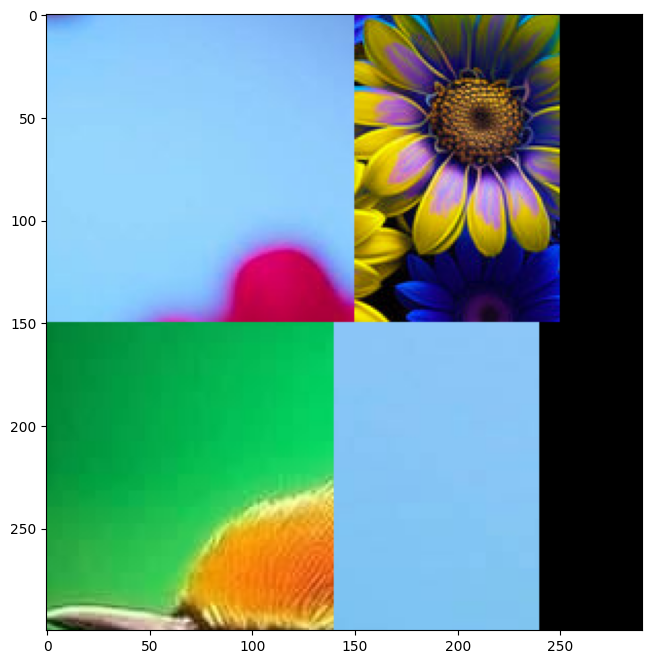

In [5]:
cv2.imwrite('collage.jpg', cv2.cvtColor(collage, cv2.COLOR_RGB2BGR))
plt.figure(figsize=(8, 8))
plt.imshow(collage)
plt.show()

In [ ]:
'''2. Brightness Adjustment with Dynamic Constraints'''

In [6]:
import cv2
import numpy as np


image = cv2.imread(r'/home/student/Downloads/image.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

avg_intensity = np.mean(gray_image)

avg_intensity

92.09395864289252

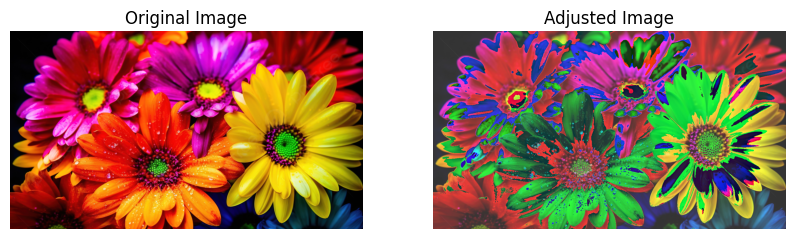

In [7]:
adjustment = 0
if avg_intensity < 100:
    adjustment = 50 
elif avg_intensity > 200:
    adjustment = -50  

adjusted_image = image + adjustment

adjusted_image = np.clip(adjusted_image, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Adjusted Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB))
plt.title('Adjusted Image')
plt.axis('off')

plt.show()


In [ ]:
'''3. Cropping Using Interactive Mouse Input'''

In [ ]:
'''with opencv'''

In [8]:
# Global variables
drawing = False  # True if mouse is pressed
ix, iy = -1, -1  # Starting point coordinates
cropped_image = None  # To store cropped ROI

# Mouse callback function to handle drawing a rectangle and cropping the image
def draw_rectangle(event, x, y, flags, param):
    global ix, iy, drawing, cropped_image

    # When the mouse is pressed, record the starting point
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    # When the mouse is released, draw the rectangle and crop the image
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(image_copy, (ix, iy), (x, y), (0, 255, 0), 2)
        cropped_image = image[iy:y, ix:x]
        cv2.imshow("Cropped ROI", cropped_image)

    # Draw the rectangle as the mouse moves
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            image_copy[:] = image[:]  # Reset the image copy
            cv2.rectangle(image_copy, (ix, iy), (x, y), (0, 255, 0), 2)
            cv2.imshow("Image", image_copy)



Cropped image saved!


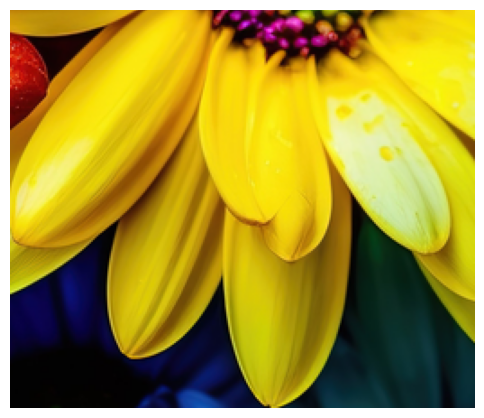

Cropped image saved!


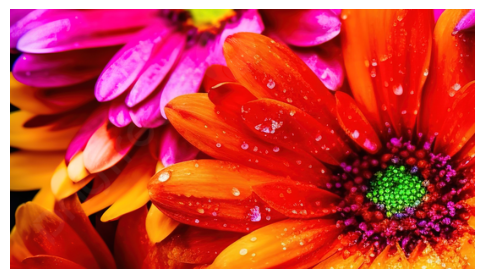

Cropped image saved!


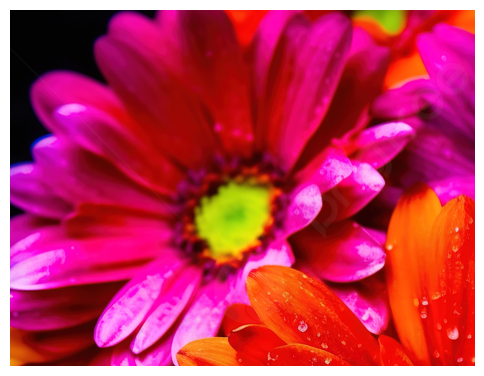

In [9]:
# Load the image
image = cv2.imread(r'/home/student/Downloads/image.jpg')
image_copy = image.copy()

cv2.imshow("Image", image_copy)
cv2.setMouseCallback("Image", draw_rectangle)

while True:
    key = cv2.waitKey(1) & 0xFF

    # Press 'r' to reset the image and select a new ROI
    if key == ord('r'):
        image_copy = image.copy()  
        cv2.imshow("Image", image_copy)
        cropped_image = None  # Clear the cropped image

    # Press 's' to save the cropped ROI and show it in the Jupyter notebook
    elif key == ord('s') and cropped_image is not None:
        cv2.imwrite('cropped_image.jpg', cropped_image)
        print("Cropped image saved!")
        cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(6,6))
        plt.imshow(cropped_image_rgb)
        plt.axis('off')  # Hide axes
        plt.show()

    # Press 'q' to quit the loop
    elif key == ord('q'):
        break
cv2.destroyAllWindows()


In [ ]:
'''without opencv'''

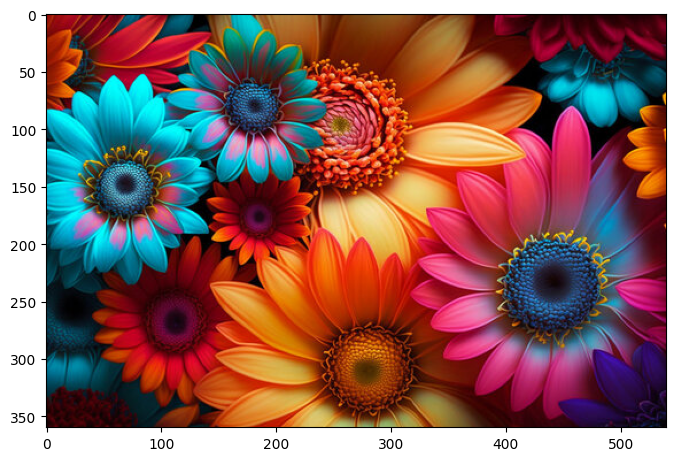

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from PIL import Image

crop_coords = []

def on_select(eclick, erelease):
    global crop_coords

    crop_coords = [eclick.xdata, eclick.ydata, erelease.xdata, erelease.ydata]
    print(f"Selected region: {crop_coords}")

    cropped_image = image[int(crop_coords[1]):int(crop_coords[3]), int(crop_coords[0]):int(crop_coords[2])]

    plt.figure(figsize=(6,6))
    plt.imshow(cropped_image)
    plt.axis('off')
    plt.title("Cropped ROI")
    plt.show()

    cropped_image_pil = Image.fromarray(cropped_image)
    cropped_image_pil.save("cropped_image.jpg")
    print("Cropped image saved as 'cropped_image.jpg'.")

def reset_selection(event):
    global crop_coords
    crop_coords = []  
    print("Selection reset. You can select a new region.")

image = np.array(Image.open(r"/home/student/Downloads/image2.jpg"))

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(image)
ax.axis('on')

rectangle_selector = RectangleSelector(ax, on_select, interactive=True)

fig.canvas.mpl_connect('key_press_event', lambda event: reset_selection(event) if event.key == 'r' else None)

plt.show()
